In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv(r"D:\Machine learning\GKiMl\SP_data.csv")

In [3]:
df.shape

(395, 33)

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Xem kiểu dữ liệu và số lượng giá trị
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.shape

(395, 33)

In [7]:
# Tổng số ô missing trong toàn bộ DataFrame
df.isna().sum().sum()

np.int64(0)

In [8]:
# Kiểm tra lại cho chắc
print(f"Tổng số ô missing: {df.isna().sum().sum()}")
print(f"Có missing nào không: {df.isna().any().any()}")

Tổng số ô missing: 0
Có missing nào không: False


In [9]:
# Kiểm tra số lượng hàng trùng lặp
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
df.describe(include="object").columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [12]:
df.describe(include=['int64', 'float64']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [13]:
categorical_cols= ['sex', 'Pstatus', 'paid', 'activities', 'higher', 'romantic']
for col in categorical_cols:
    print(f"Value counts for {col}: \n {df[col].value_counts()}")

Value counts for sex: 
 sex
F    208
M    187
Name: count, dtype: int64
Value counts for Pstatus: 
 Pstatus
T    354
A     41
Name: count, dtype: int64
Value counts for paid: 
 paid
no     214
yes    181
Name: count, dtype: int64
Value counts for activities: 
 activities
yes    201
no     194
Name: count, dtype: int64
Value counts for higher: 
 higher
yes    375
no      20
Name: count, dtype: int64
Value counts for romantic: 
 romantic
no     263
yes    132
Name: count, dtype: int64


# Phân tích đơn biến (Univariate Analysis): Xem xét từng biến riêng lẻ.
#    + Biến số (Numerical): Dùng biểu đồ histogram, box plot để xem phân phối, tìm giá trị ngoại lai (outliers).
#    + Biến phân loại (Categorical): Dùng biểu đồ cột (bar chart) để xem tần suất của từng danh mục

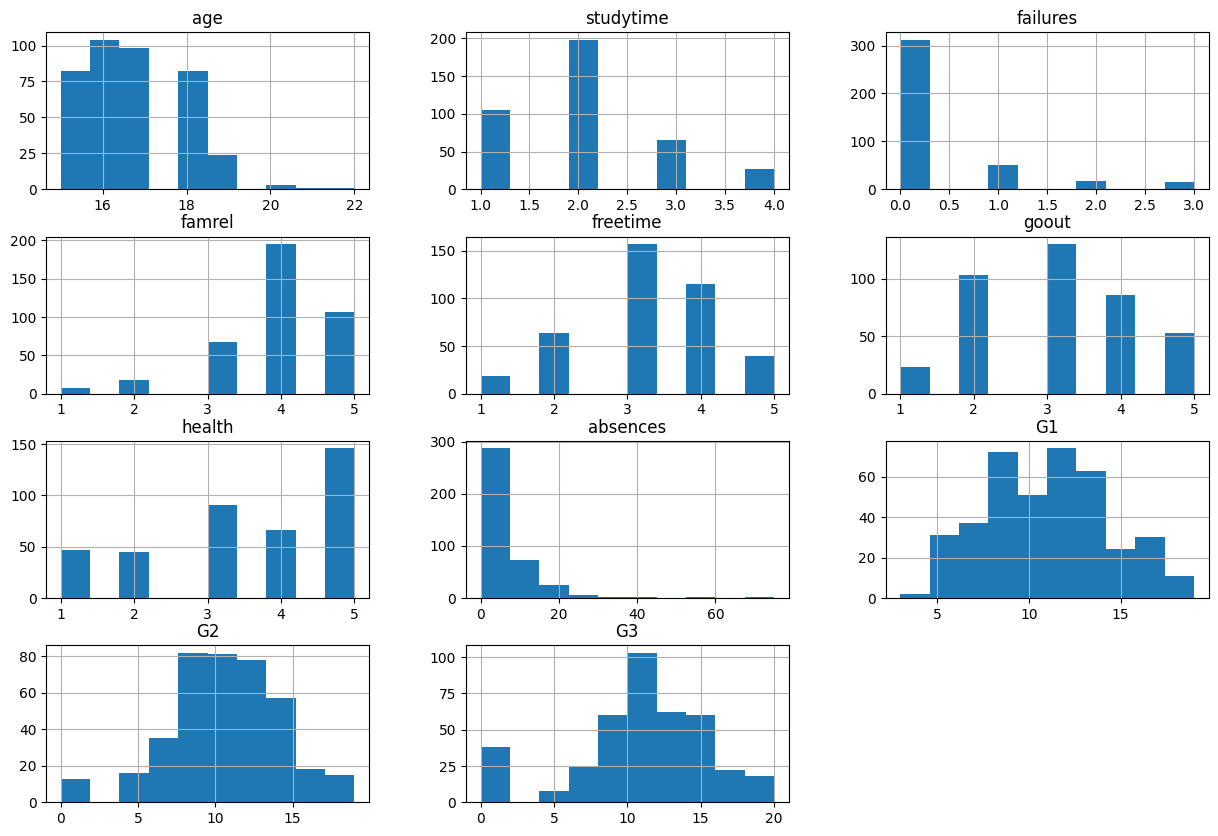

In [14]:
df[['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences','G1',  'G2' ,'G3']].hist()
plt.gcf().set_size_inches(15,10)

In [15]:
df[['age', 'studytime', "failures", 'famrel', 'freetime', 'goout', 'health' ,"absences", 'G1', 'G2', 'G3']].skew()
# Gan 0 thi khong lech, am trai, duong phai

age          0.466270
studytime    0.632142
failures     2.387026
famrel      -0.951882
freetime    -0.163351
goout        0.116502
health      -0.494604
absences     3.671579
G1           0.240613
G2          -0.431645
G3          -0.732672
dtype: float64

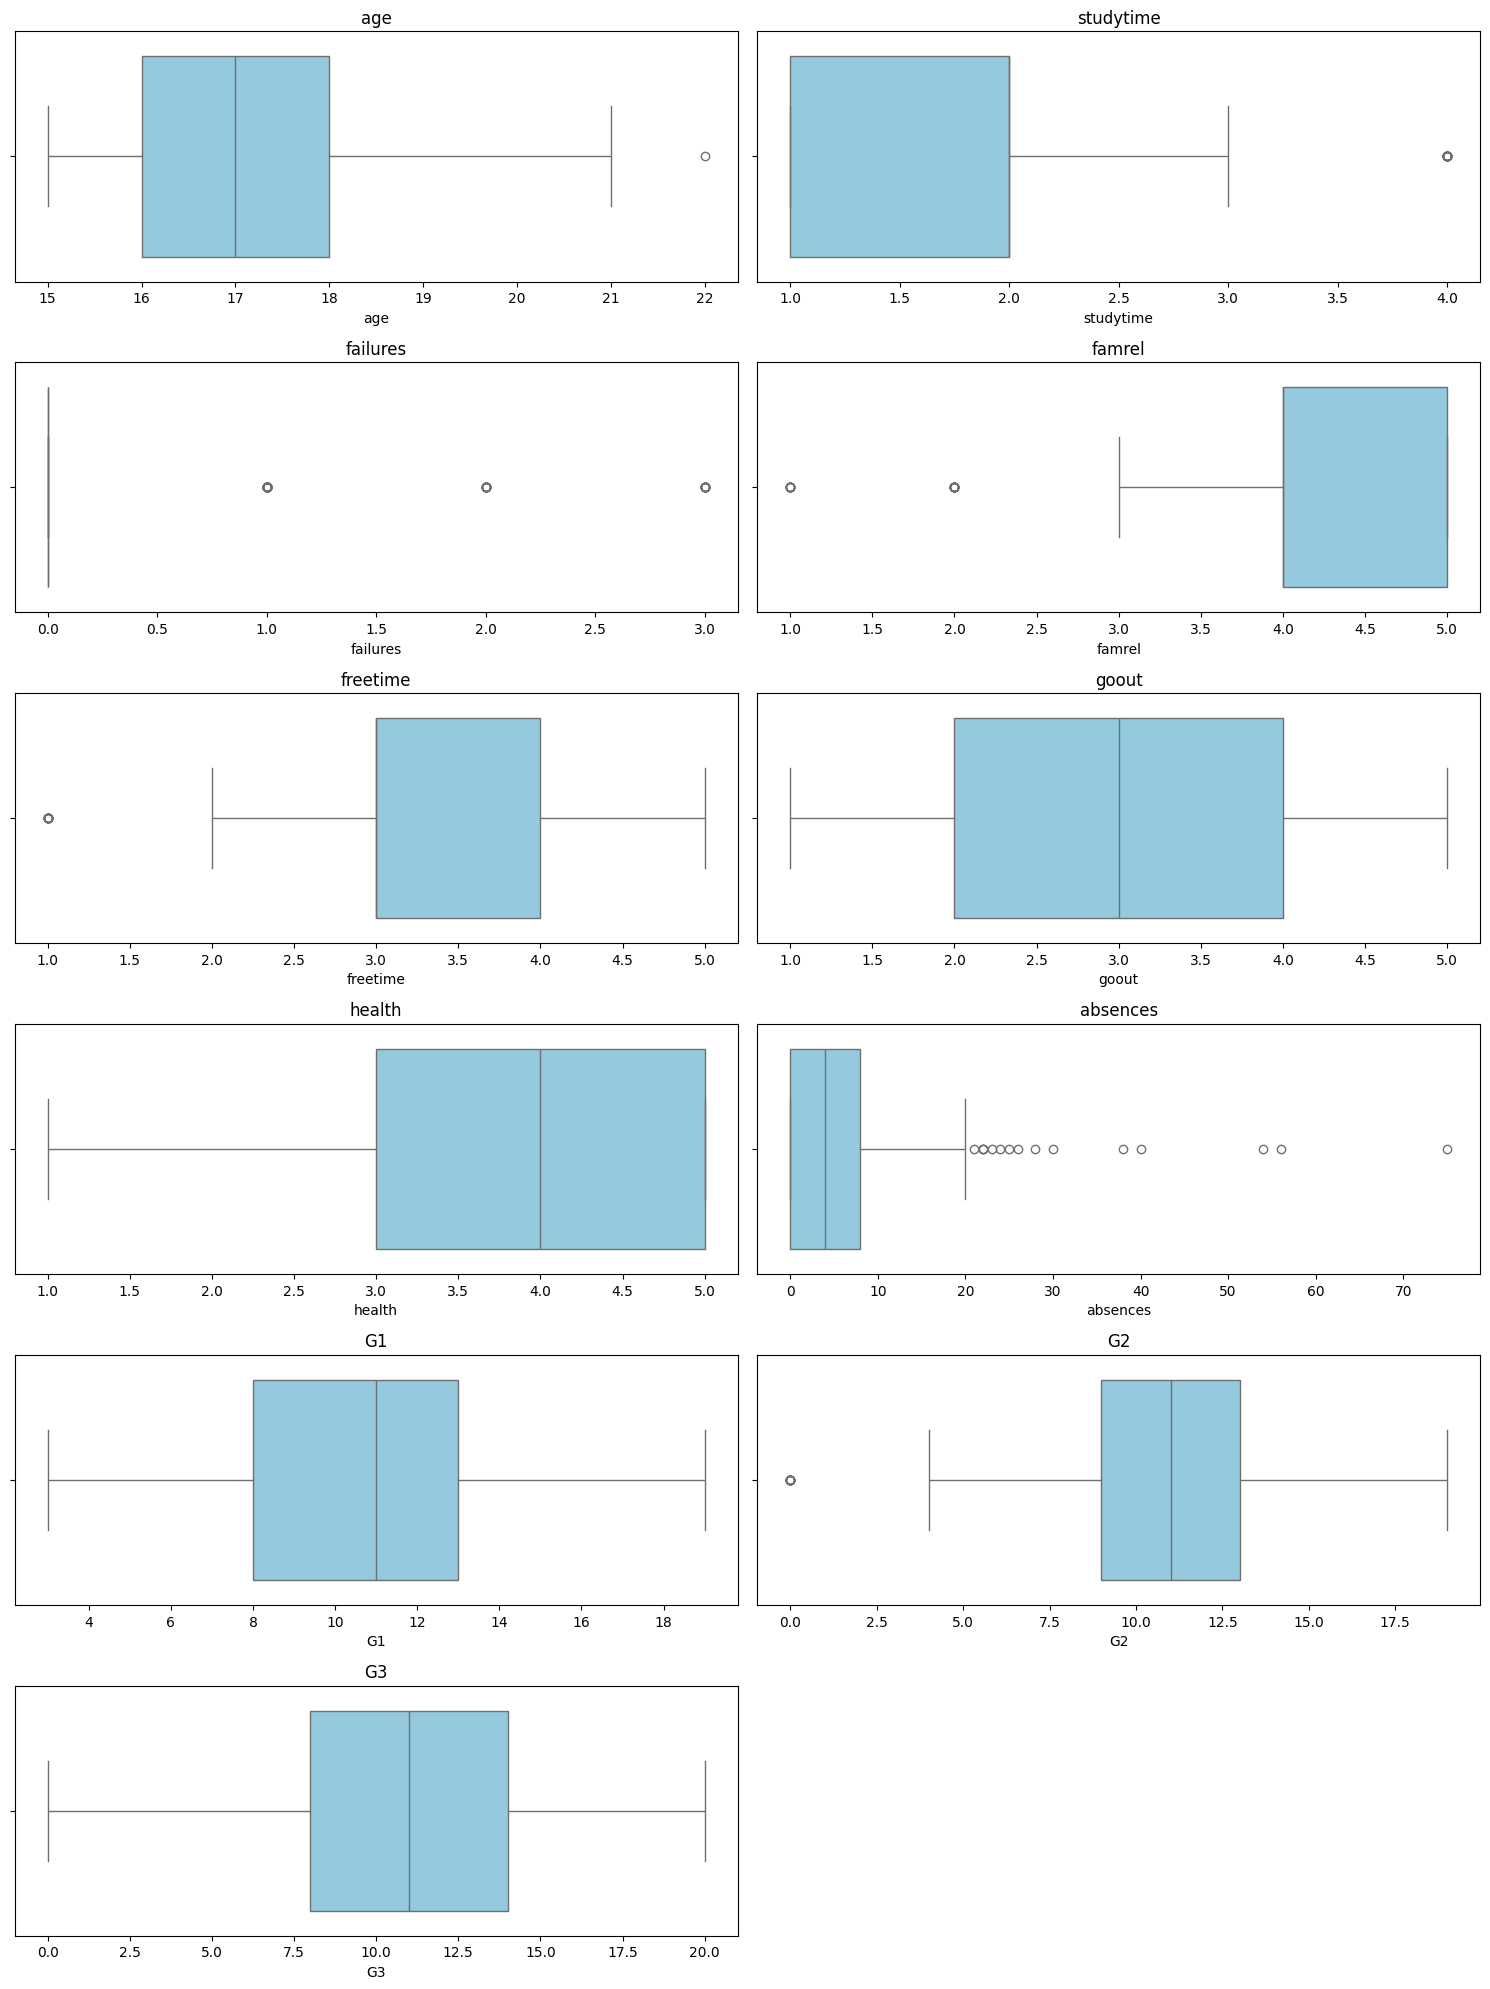

In [16]:
num_cols = ['age', 'studytime', "failures", 'famrel', 'freetime', 'goout', 'health' ,"absences", 'G1', 'G2', 'G3']

# Vẽ boxplot cho từng cột
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)  # Tự động chia lưới
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=12)
plt.tight_layout()
plt.show()

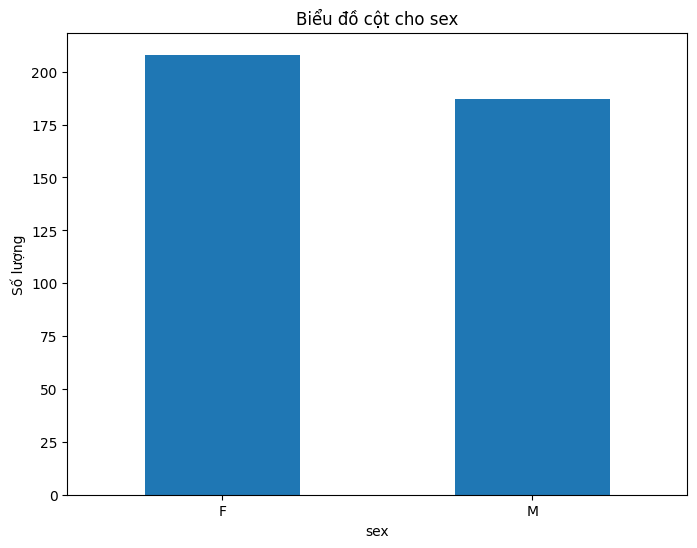

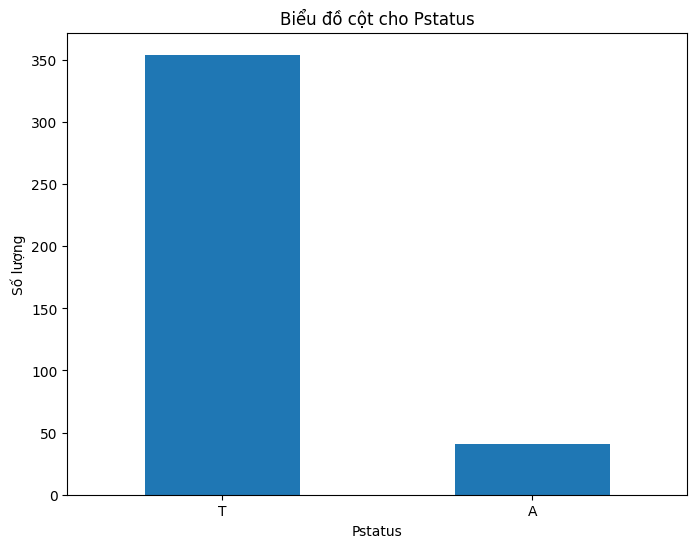

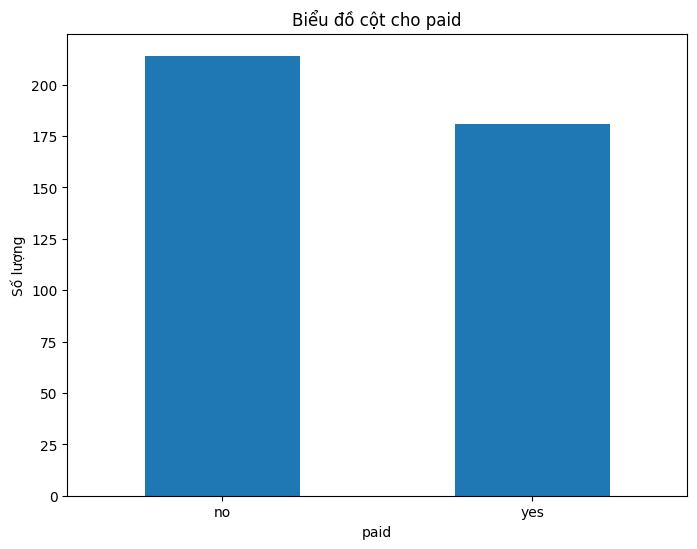

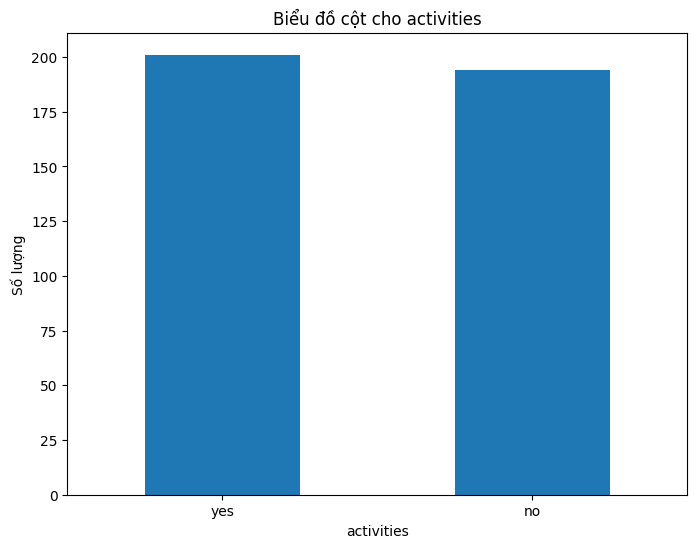

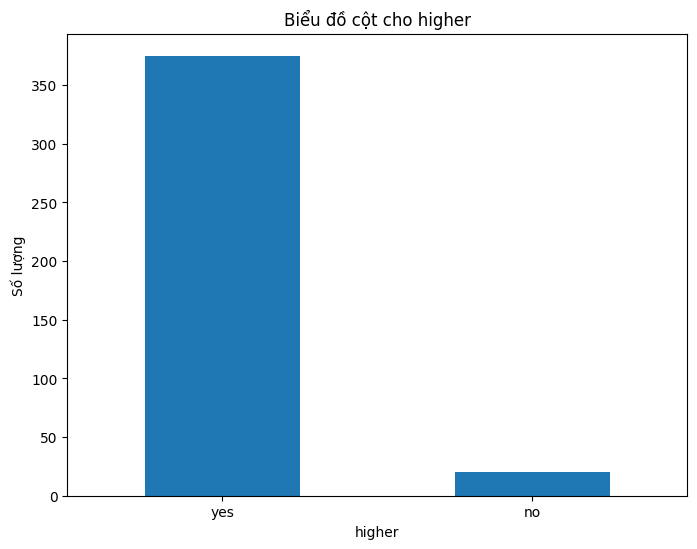

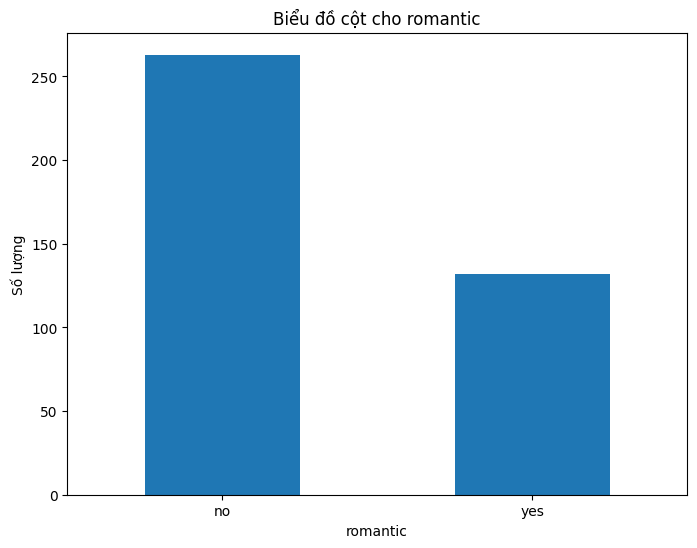

In [17]:
for col in categorical_cols:
    value_counts = df[col].value_counts()

    # Vẽ biểu đồ cột
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')

    # Thêm tiêu đề và nhãn
    plt.title(f'Biểu đồ cột cho {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=0) # Giữ nhãn trục X thẳng đứng

    plt.show()

# Phân tích đa biến
#   +Dùng biểu đồ tán xạ (scatter plot) để xem mối quan hệ giữa hai biến số.
#   + Dùng ma trận tương quan (correlation matrix) để đo lường mức độ tương quan tuyến tính.
#   + So sánh phân phối của một biến số qua các danh mục khác nhau bằng box plot

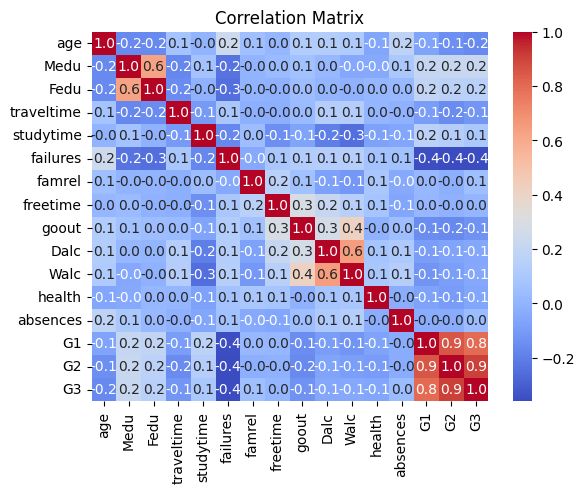

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

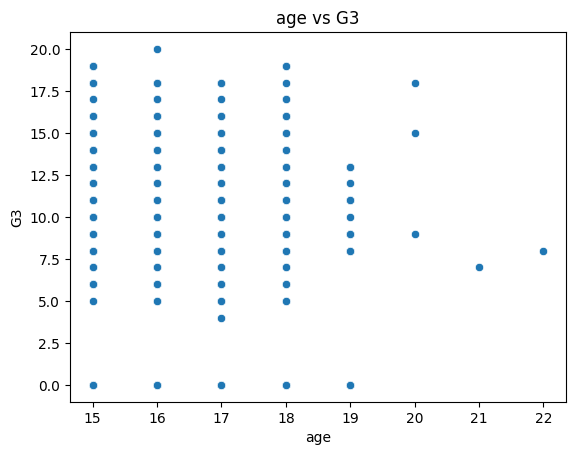

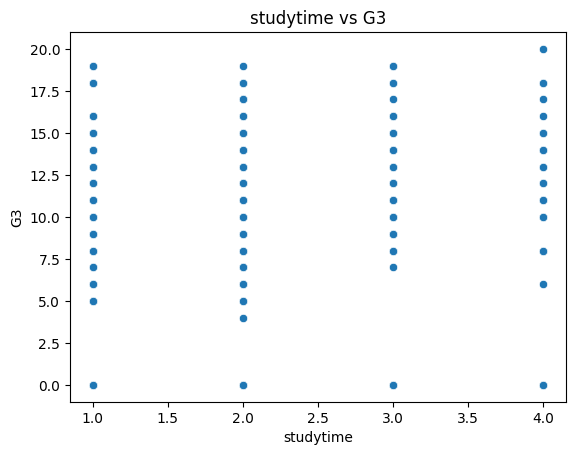

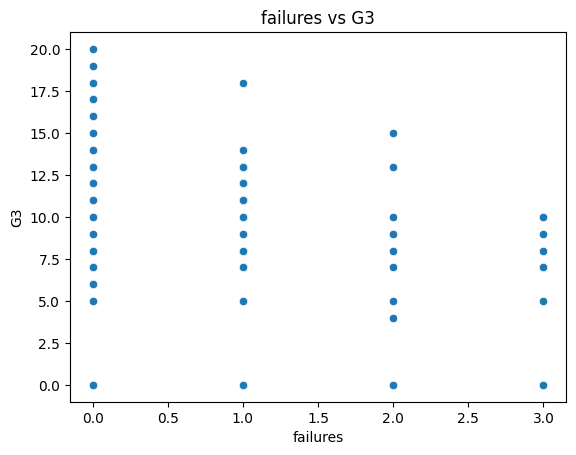

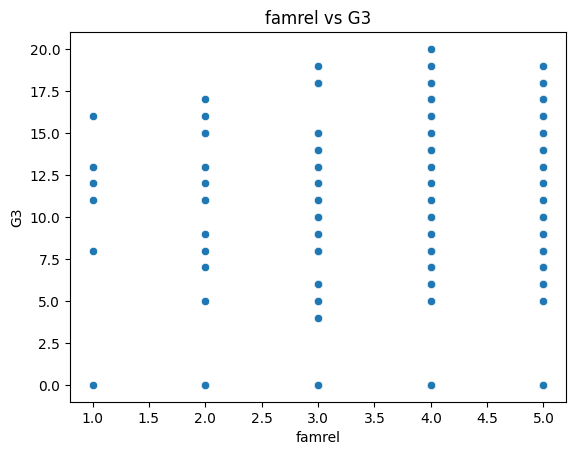

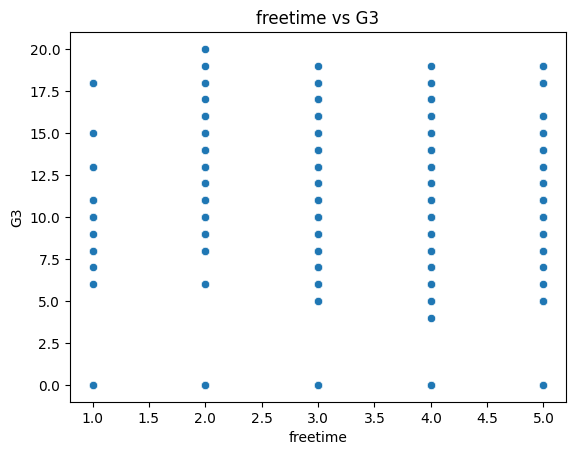

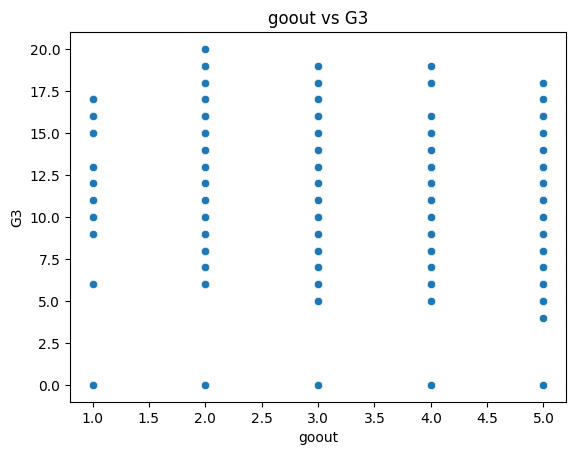

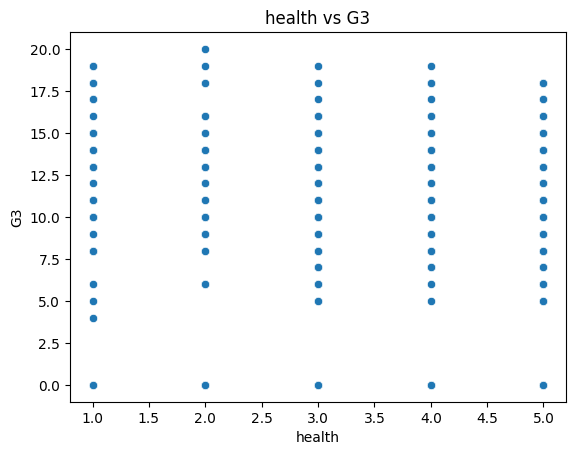

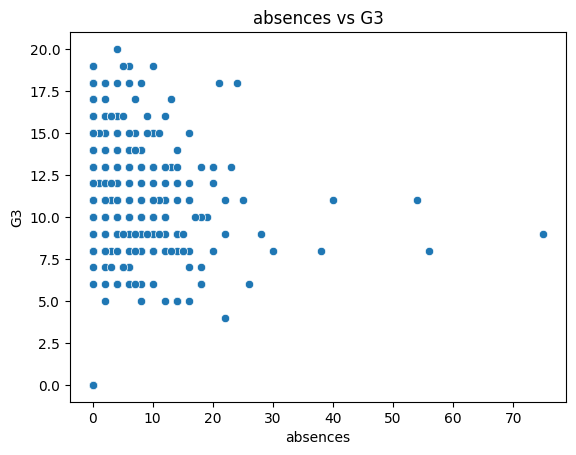

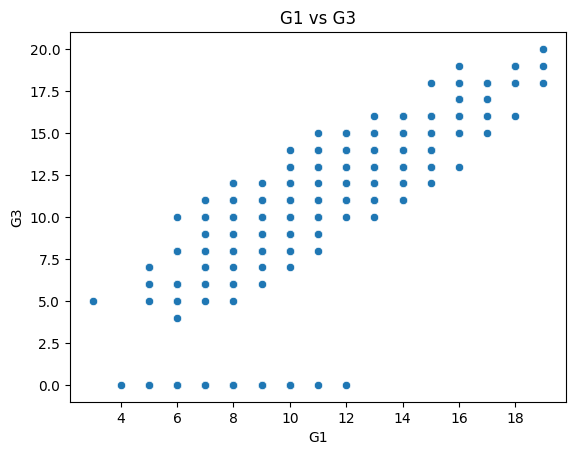

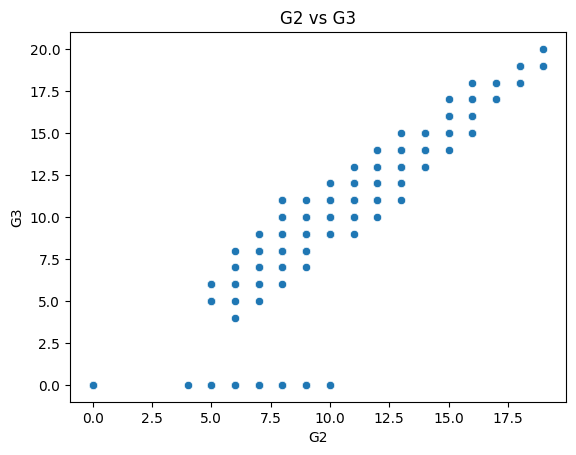

In [19]:
num_features=['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1', 'G2']
for feature in num_features:
    sns.scatterplot(data=df, x = feature, y= 'G3') 
    plt.title(f"{feature} vs G3")
    plt.show()

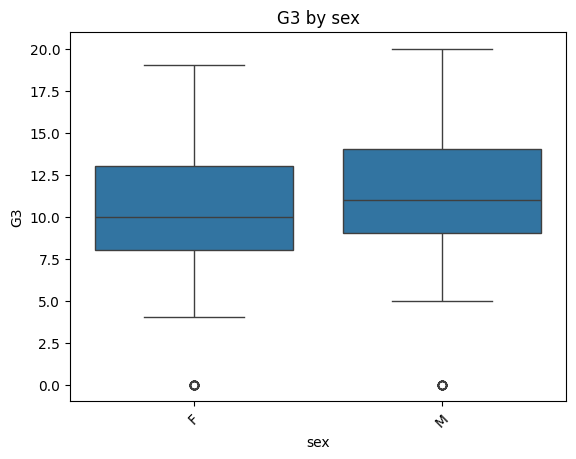

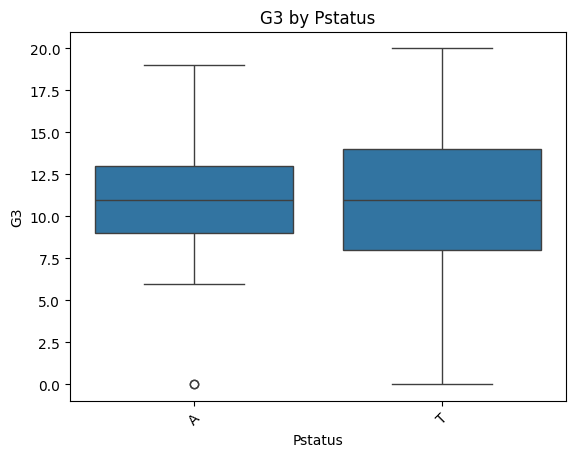

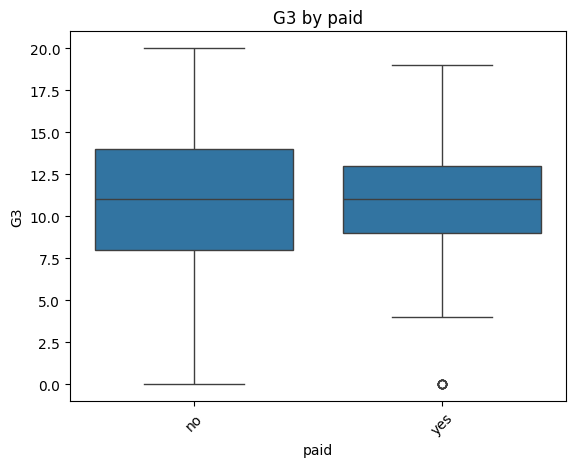

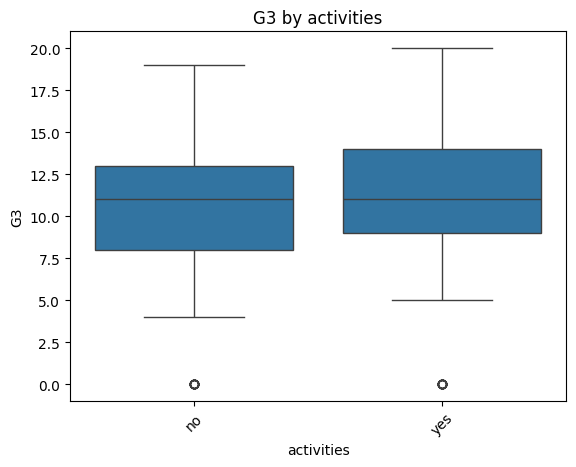

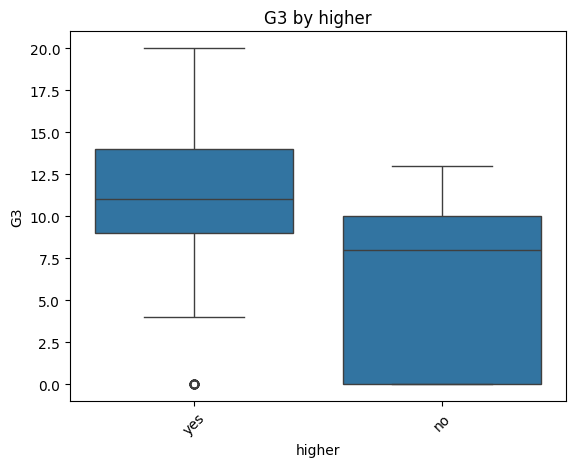

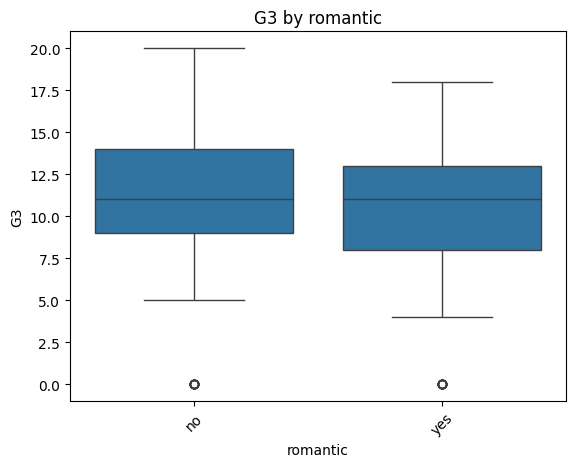

In [20]:
for col in categorical_cols:
    sns.boxplot(data = df, x= col, y= 'G3')
    plt.title(f"G3 by {col}")
    plt.xticks(rotation=45)
    plt.show()

# Tiền xử lí 
# Xóa bớt cột, Đưa điểm về thang 10,Thêm cột G_Avg tránh đa cộng tuyến,Xử lí dữ liệu thiếu, Xử lí outliers, Thêm cột mã hóa, chuẩn hóa dữ liệu

In [21]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [22]:
columns_to_drop = ['address', 'famsize', 'Medu','Fedu','Mjob', 'Fjob','reason', 'guardian','traveltime', 'schoolsup', 'famsup', 'nursery','internet', 'Dalc', 'Walc']

df = df.drop(columns=columns_to_drop)

In [23]:
# Chia thang điểm 20 về thang điểm 10
def divide_grades(X):
    X = X.copy()
    for g in ["G1", "G2", "G3"]:
        if g in X.columns and (g + "_10") not in X.columns:
            X[g + "_10"] = X[g] / 2.0
            
    print("-> Đã cập nhật thang điểm 20 về 10 cho: G1, G2, G3")
    return X

df = df.drop(columns=["G1_10", "G2_10", "G3_10"], errors="ignore")
df = divide_grades(df)
print(df[['G1', 'G1_10', 'G2', 'G2_10', 'G3', 'G3_10']].head())

-> Đã cập nhật thang điểm 20 về 10 cho: G1, G2, G3
   G1  G1_10  G2  G2_10  G3  G3_10
0   5    2.5   6    3.0   6    3.0
1   5    2.5   5    2.5   6    3.0
2   7    3.5   8    4.0  10    5.0
3  15    7.5  14    7.0  15    7.5
4   6    3.0  10    5.0  10    5.0


In [24]:
df['G_Avg'] = (df['G1_10'] + df['G2_10']) / 2

# Hiển thị 5 hàng đầu tiên để kiểm tra kết quả
print(df.head())

  school sex  age Pstatus  studytime  failures paid activities higher  \
0     GP   F   18       A          2         0   no         no    yes   
1     GP   F   17       T          2         0   no         no    yes   
2     GP   F   15       T          2         3  yes         no    yes   
3     GP   F   15       T          3         0  yes        yes    yes   
4     GP   F   16       T          2         0  yes         no    yes   

  romantic  ...  goout  health  absences  G1  G2  G3  G1_10  G2_10  G3_10  \
0       no  ...      4       3         6   5   6   6    2.5    3.0    3.0   
1       no  ...      3       3         4   5   5   6    2.5    2.5    3.0   
2       no  ...      2       3        10   7   8  10    3.5    4.0    5.0   
3      yes  ...      2       5         2  15  14  15    7.5    7.0    7.5   
4       no  ...      2       5         4   6  10  10    3.0    5.0    5.0   

   G_Avg  
0   2.75  
1   2.50  
2   3.75  
3   7.25  
4   4.00  

[5 rows x 22 columns]


In [25]:
#Xử lý dữ liệu thiếu (missing data)

# Chia các cột thành: cột số (numeric) và cột phân loại (categorical)
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Bắt đầu xử lý dữ liệu thiếu")
missing_before = df.isna().sum()
missing_before = missing_before[missing_before > 0]

# Kiểm tra xem có giá trị thiếu hay không
if len(missing_before) == 0:
    print("✅ Không có giá trị thiếu nào trong dữ liệu.")
else:
    print(f"Có {len(missing_before)} cột có giá trị thiếu:\n{missing_before}\n")

    #Điền giá trị trung bình cho các cột số
    for col in num_cols:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())
            print(f"✔️ Đã điền giá trị trung bình cho cột số: {col}")

    #Điền giá trị mode (giá trị xuất hiện nhiều nhất) cho các cột phân loại
    for col in cat_cols:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
            print(f"✔️ Đã điền giá trị mode cho cột phân loại: {col}")

    print("\nHoàn tất xử lý dữ liệu thiếu.")

#Kiểm tra lại sau khi xử lý
missing_after = df.isna().sum().sum()
print(f"\nTổng số giá trị thiếu sau khi xử lý: {missing_after}")


Bắt đầu xử lý dữ liệu thiếu
✅ Không có giá trị thiếu nào trong dữ liệu.

Tổng số giá trị thiếu sau khi xử lý: 0


In [26]:
# Xử lí ngoại lệ (outliers)
capping_cols = ['age', 'absences', 'famrel', 'studytime', 'freetime', 'G2_10']
capping_cols_present = [c for c in capping_cols if c in df.columns]  
def cap_outliers_iqr_np_all(X):
    X = X.copy()
    for col in capping_cols:
        X = cap_outliers_iqr_np(X, col)
    return X 
def cap_outliers_iqr_np(df, col):
    df = df.copy() # Để tránh thay đổi df gốc
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    print(f"-> Đã Capping cột: {col}. Giới hạn IQR: [{lower:.2f}, {upper:.2f}]")
    return df
for col in capping_cols:
    df = cap_outliers_iqr_np(df, col)
print("✅ Đã xử lý ngoại lệ (outliers).")

-> Đã Capping cột: age. Giới hạn IQR: [13.00, 21.00]
-> Đã Capping cột: absences. Giới hạn IQR: [-12.00, 20.00]
-> Đã Capping cột: famrel. Giới hạn IQR: [2.50, 6.50]
-> Đã Capping cột: studytime. Giới hạn IQR: [-0.50, 3.50]
-> Đã Capping cột: freetime. Giới hạn IQR: [1.50, 5.50]
-> Đã Capping cột: G2_10. Giới hạn IQR: [1.50, 9.50]
✅ Đã xử lý ngoại lệ (outliers).


In [27]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
pre_encoding = ['school', 'sex', 'Pstatus', 'paid', 'activities', 'higher', 'romantic']
pre_encoding_present = [c for c in pre_encoding if c in df.columns] # Kiểm tra cột có trong df
encoders = {}
for col in pre_encoding_present:
    df[col] = df[col].astype(str).str.strip()  # chuẩn hóa chuỗi
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    mapping = {k: int(v) for v, k in enumerate(le.classes_)}
    encoders[col] = {"label_encoder": le, "mapping": mapping}
    print(f"Encoded {col} -> {col + 'encoded'} (classes: {list(le.classes_)})")
print("✅ Đã mã hóa các biến phân loại.")

Encoded school -> schoolencoded (classes: ['GP', 'MS'])
Encoded sex -> sexencoded (classes: ['F', 'M'])
Encoded Pstatus -> Pstatusencoded (classes: ['A', 'T'])
Encoded paid -> paidencoded (classes: ['no', 'yes'])
Encoded activities -> activitiesencoded (classes: ['no', 'yes'])
Encoded higher -> higherencoded (classes: ['no', 'yes'])
Encoded romantic -> romanticencoded (classes: ['no', 'yes'])
✅ Đã mã hóa các biến phân loại.


In [28]:
# Feature Scaling (chuẩn hóa dữ liệu)
pipeline = Pipeline([
    ('divide', FunctionTransformer(divide_grades)),
    ('cap', FunctionTransformer(cap_outliers_iqr_np_all)),
])
print("✅ Đã tạo pipeline chuẩn hóa dữ liệu.")

✅ Đã tạo pipeline chuẩn hóa dữ liệu.


In [29]:
# Fit pipeline lên dữ liệu
fixed=pipeline.fit_transform(df)

-> Đã cập nhật thang điểm 20 về 10 cho: G1, G2, G3
-> Đã Capping cột: age. Giới hạn IQR: [13.00, 21.00]
-> Đã Capping cột: absences. Giới hạn IQR: [-12.00, 20.00]
-> Đã Capping cột: famrel. Giới hạn IQR: [2.50, 6.50]
-> Đã Capping cột: studytime. Giới hạn IQR: [-0.50, 3.50]
-> Đã Capping cột: freetime. Giới hạn IQR: [1.50, 5.50]
-> Đã Capping cột: G2_10. Giới hạn IQR: [1.50, 9.50]


In [30]:
fixed.to_csv("processed.csv", index=False)
print("✅ Đã lưu dữ liệu đã xử lý vào 'student_data_processed.csv'.")

✅ Đã lưu dữ liệu đã xử lý vào 'student_data_processed.csv'.


In [31]:
joblib.dump(pipeline, "preprocess.pkl")
joblib.dump(encoders, "encoder.pkl")
print("✅ Đã lưu preprocess.pkl")
print("✅ Đã lưu encoder.pkl")

✅ Đã lưu preprocess.pkl
✅ Đã lưu encoder.pkl


# Vẽ lại các biểu đồ để xem lại phân phối, kiểm tra dữ liệu,...

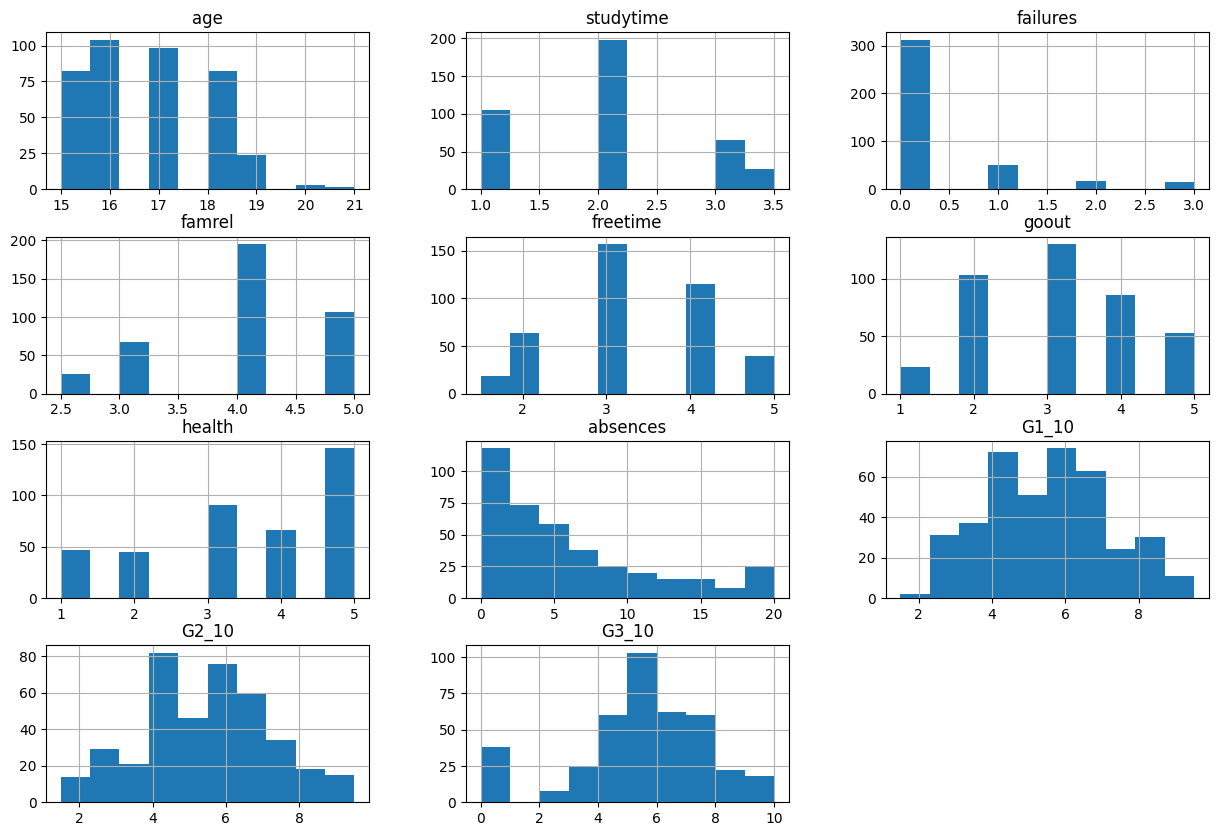

In [32]:
# vẽ lại his
df[['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1_10', 'G2_10', 'G3_10']].hist()
plt.gcf().set_size_inches(15,10)

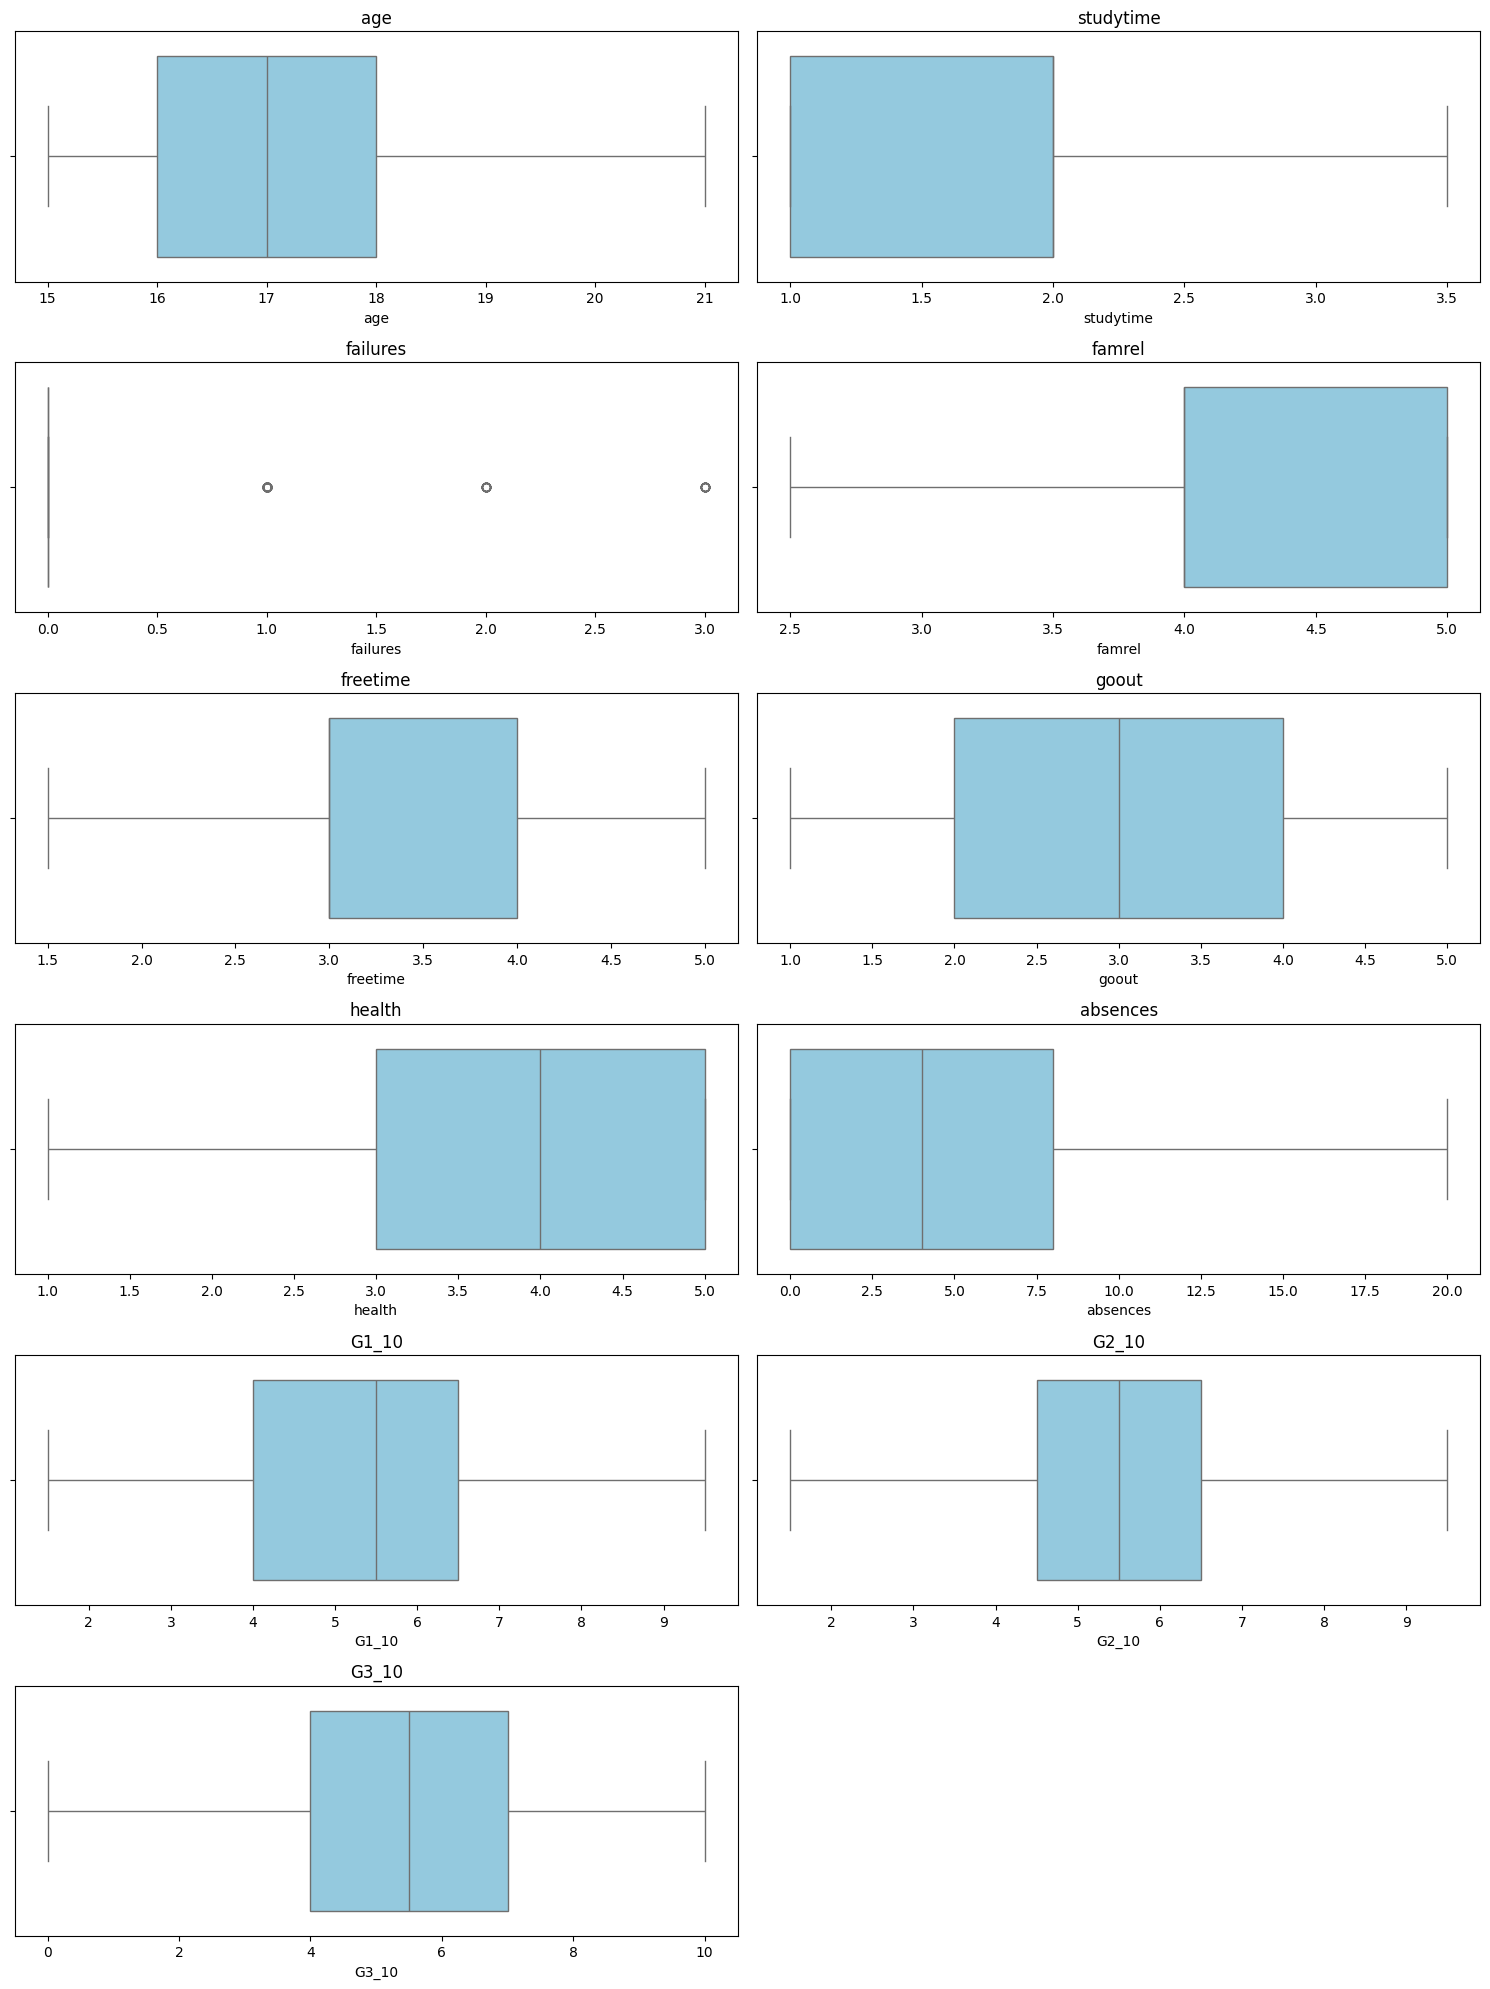

In [33]:
# Vẽ lại boxplot
num_cols = ['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1_10', 'G2_10', 'G3_10']
# Vẽ boxplot cho từng cột
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)  # Tự động chia lưới
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=12)
plt.tight_layout()
plt.show()

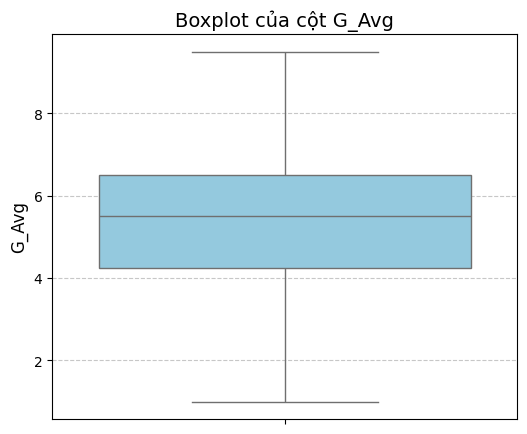

In [34]:
#Vẽ boxplot của cột Avg để xem có outliers không
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['G_Avg'], color='skyblue')

plt.title("Boxplot của cột G_Avg", fontsize=14)
plt.ylabel("G_Avg", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Training model

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
df = pd.read_csv("processed.csv")

In [ ]:
df.head()

In [37]:
# --- Seed cố định (đảm bảo tái lập kết quả) ---
RANDOM_STATE = 42

In [38]:
# Thiết lập Cross-Validation cố định
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [ ]:
features = ['sex_encoded', 'age', 'failures', 'higher_encoded', 'absences', 'G_Avg']

target = "G3_10"

In [40]:
# --- Chuẩn bị dữ liệu ---
X = df[features].copy()
y = df[target].copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)


In [ ]:
models = {
    "Baseline(mean)": {
        "model": DummyRegressor(strategy="mean"),
        "params": {}
    },
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=RANDOM_STATE),
        "params": {
            "max_depth": [3, 5, 7], 
            "min_samples_split": [5, 10], 
            "min_samples_leaf": [2, 5] 
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=RANDOM_STATE),
        "params": {
            "max_depth": [3, 7], 
            "min_samples_leaf": [5, 10, 20], 
            "n_estimators": [50, 100]
        }
    }
}

In [ ]:
best_models=[]

In [ ]:
models_metrics = {}

In [ ]:
for name, config in models.items():
    print(f"Training {name}")
    
    grid = GridSearchCV(config["model"], config["params"], cv=cv, scoring="neg_mean_squared_error")
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    best_models.append({
    "model": name,
    "best_params": grid.best_params_,
    "rmse": rmse,
    "r2": r2

   
})
    models_metrics[name] = {
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2,
        "best_estimator": grid.best_estimator_
    }

In [ ]:
best_models

In [ ]:
results_df = pd.DataFrame(best_models)
results_df 

In [ ]:
results_df.sort_values(by="rmse")

In [ ]:
best_row = results_df.sort_values(by="rmse").iloc[0]

best_row

In [ ]:
best_model_name = best_row["model"]

best_model_name


In [ ]:
best_params = best_row['best_params']
best_params

In [ ]:
best_model = models[best_model_name]["model"].set_params(**best_params)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
joblib.dump(best_model, "best_model.pkl")

In [ ]:
joblib.load("best_model.pkl").predict(X_test)

In [ ]:
joblib.dump(models_metrics, "models_metrics.pkl")
print("✅ Đã lưu metrics của baseline và candidates: models_metrics.pkl")
print("📊 Metrics đã lưu:")
for name, metrics in models_metrics.items():
    print(f"  {name}: RMSE={metrics['rmse']:.4f}, R²={metrics['r2']:.4f}")